<a href="https://colab.research.google.com/github/mithinKumar/Machine-Learning-Learners-Space/blob/main/linear_regression_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

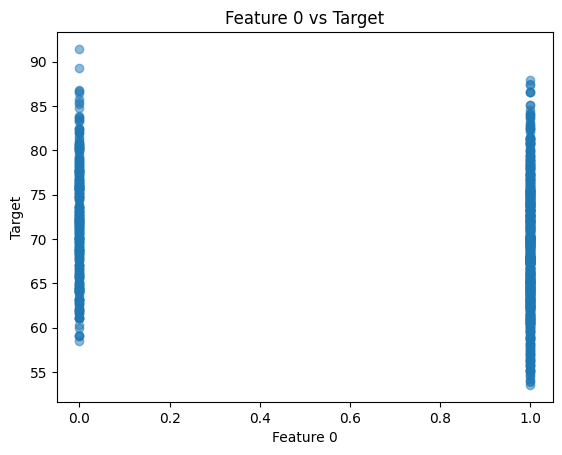

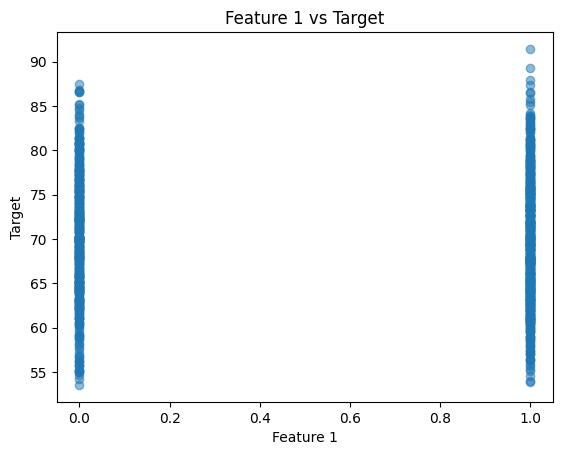

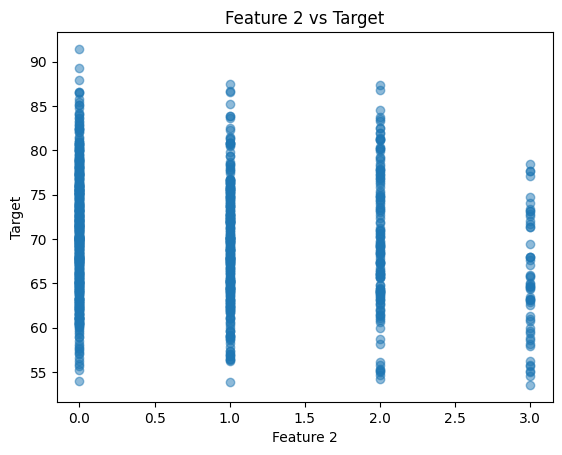

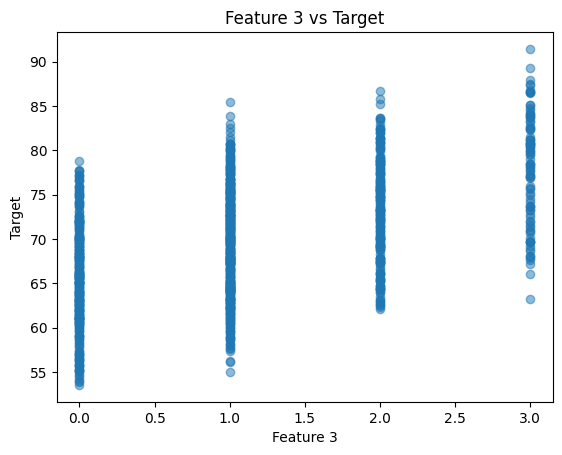

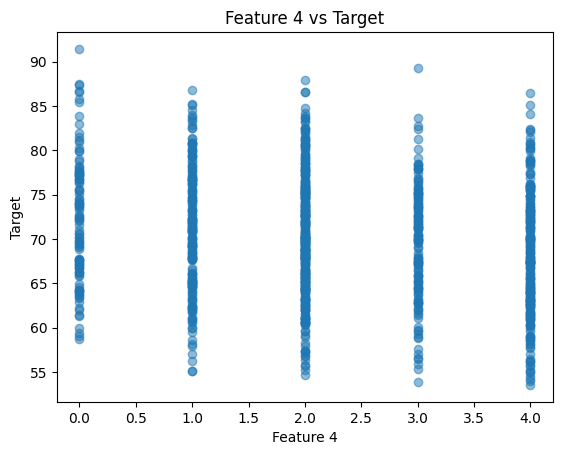

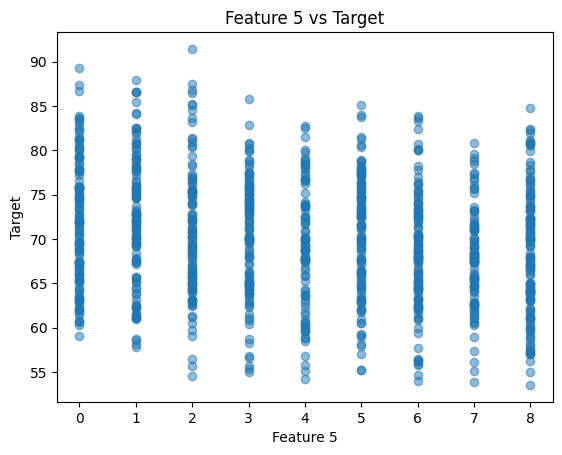

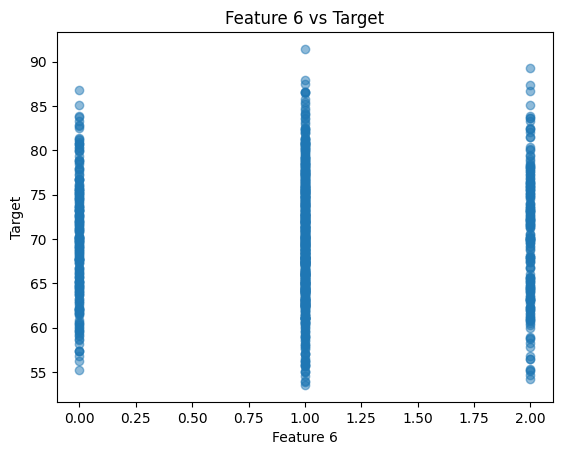

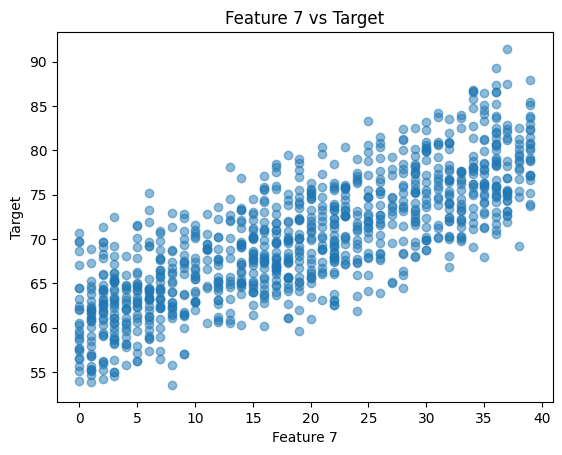

[[ 0  1  1 ...  5  1 28]
 [ 1  1  1 ...  6  2 17]
 [ 1  1  2 ...  4  1 18]
 ...
 [ 1  1  1 ...  4  0 33]
 [ 1  0  0 ...  7  0 14]
 [ 1  1  0 ...  5  1 38]]


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:, 0:8])
y_train = np.array(data.iloc[:, 8]).reshape(-1, 1)

def feature_changing(x_train):
    df_train = pd.DataFrame(x_train)

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Iterate over each column
    for column in df_train.columns:
        if df_train[column].dtype == object:  # Check if the column type is object (string)
            df_train[column] = label_encoder.fit_transform(df_train[column])

    # Convert back to numpy array if needed
    x_train_encoded = df_train.to_numpy()

    return x_train_encoded

# Apply feature_changing to x_train
x_train = feature_changing(x_train)

# Function to visualize relationships
def plot_features_vs_target(x_train, y_train):
    df_train = pd.DataFrame(x_train)
    y_train_series = pd.Series(y_train.flatten())

    for column in df_train.columns:
        plt.figure()
        plt.scatter(df_train[column], y_train_series, alpha=0.5)
        plt.title(f"Feature {column} vs Target")
        plt.xlabel(f"Feature {column}")
        plt.ylabel("Target")
        plt.show()

# Visualize the relationships
plot_features_vs_target(x_train, y_train)



print(x_train)


In [127]:

def z_score(x_train):
    # Calculate the mean and standard deviation for each feature
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)

    # Apply z-score normalization
    x_train = (x_train - x_mean) / x_std

    return x_train, x_std, x_mean


In [128]:
def cost(x_train, y_train, w, b):
    # Number of training examples
    m = x_train.shape[0]

    # Calculate predictions
    y_pred = np.dot(x_train, w) + b

    # Calculate errors
    errors = y_pred - y_train

    # Compute Mean Squared Error
    loss = (1 / (2 * m)) * np.sum(errors ** 2)

    return loss

In [129]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01):
    # Number of training examples
    m = x_train.shape[0]

    # Calculate predictions
    y_pred = np.dot(x_train,w) + b

    # Compute gradients
    dw = (1 / m) * np.dot( x_train.T,(y_pred - y_train))
    db = (1 / m) * np.sum(y_pred - y_train)

    # Update weights and bias
    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w, b


In [130]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
